In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
bs = 64

In [5]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False, verbose=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



Data set link : https://www.kaggle.com/c/dogs-vs-cats

In [6]:
# Enter the path to the folder folder hierarchy
# folder hierarchy is
# PetImages
# \Train
# \\Cat
# \\Dog
# \Test
# \\Cat
# \\Dog
path = "/home/daneshwar/Desktop/fastai_new_folder/catvsdog/PetImages"


In [7]:
path

'/home/daneshwar/Desktop/fastai_new_folder/catvsdog/PetImages'

In [8]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [9]:
data

ImageDataBunch;

Train: LabelList (22560 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Dog,Dog,Dog,Dog,Dog
Path: /home/daneshwar/Desktop/fastai_new_folder/catvsdog/PetImages;

Valid: LabelList (5639 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Cat,Cat,Dog,Cat,Dog
Path: /home/daneshwar/Desktop/fastai_new_folder/catvsdog/PetImages;

Test: None

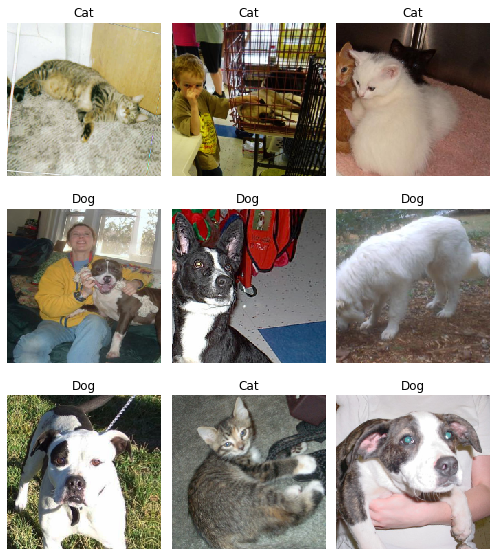

In [10]:
data.show_batch(rows=3, figsize=(7, 8))


In [11]:
print(data.classes)
len(data.classes),data.c

['Cat', 'Dog']


(2, 2)

In [12]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


In [13]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [14]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.085586,0.028870,0.008335,05:16
1,0.049595,0.027266,0.009576,05:46
2,0.035650,0.025545,0.009044,05:54
3,0.030558,0.021117,0.007448,06:05


In [15]:
learn.save('stage-1')

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

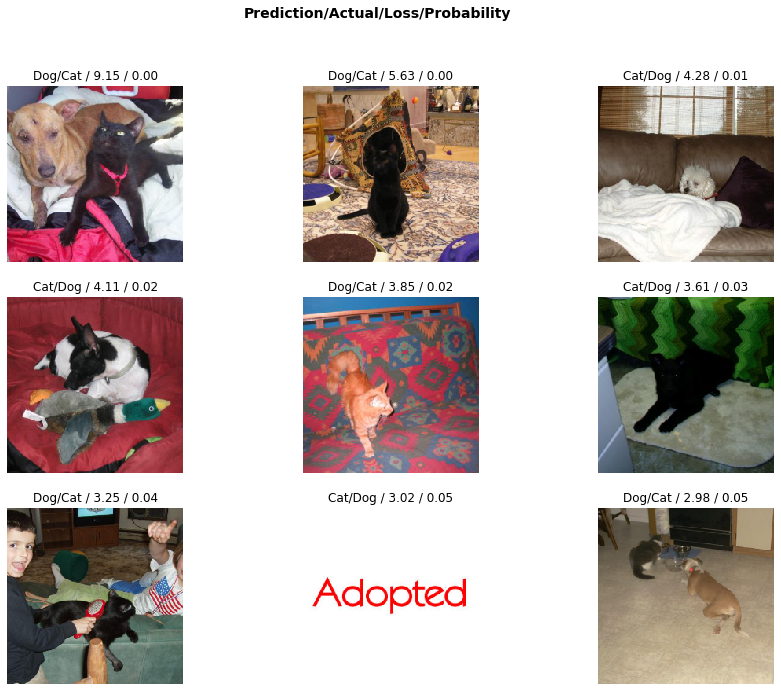

In [17]:
interp.plot_top_losses(9, figsize=(15,11))

In [18]:
doc(interp.plot_top_losses)

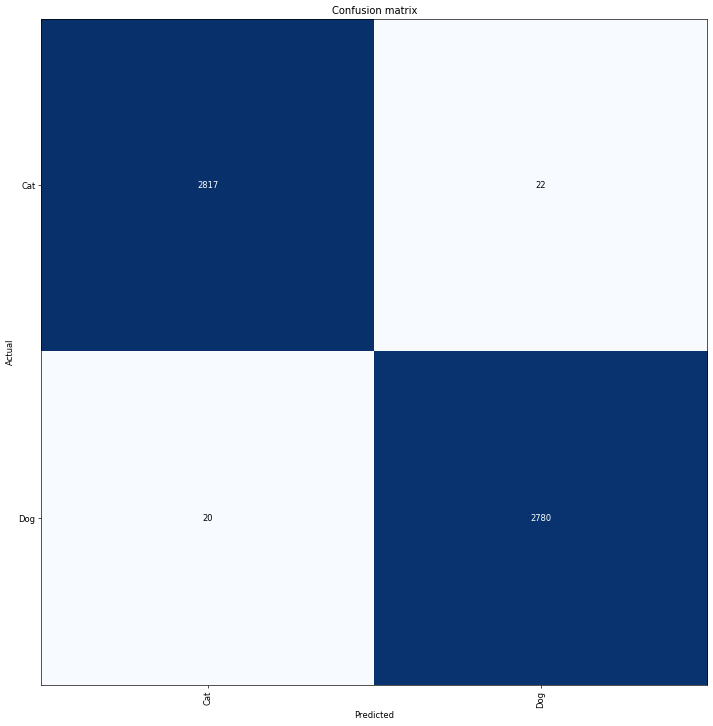

In [19]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [20]:
interp.most_confused(min_val=2)

[('Cat', 'Dog', 22), ('Dog', 'Cat', 20)]

In [21]:
learn.unfreeze()

In [22]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.052739,0.029872,0.011350,06:24


In [23]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (22560 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Dog,Dog,Dog,Dog,Dog
Path: /home/daneshwar/Desktop/fastai_new_folder/catvsdog/PetImages;

Valid: LabelList (5639 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Cat,Cat,Dog,Cat,Dog
Path: /home/daneshwar/Desktop/fastai_new_folder/catvsdog/PetImages;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False

In [24]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


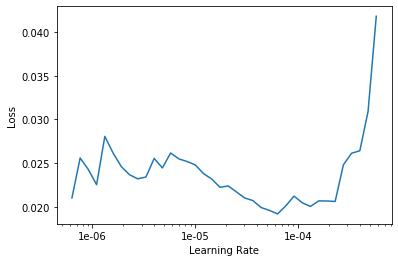

In [25]:
learn.recorder.plot()

In [26]:
learn.unfreeze()

In [27]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.035679,0.018671,0.006739,06:40
1,0.019830,0.018819,0.006739,08:25


In [28]:
learn.save('stage-2')

In [29]:
learn = cnn_learner(data, models.resnet34).load('stage-2')

In [30]:
learn.export()

In [57]:
learn = load_learner("/home/daneshwar/Desktop/fastai_new_folder/catvsdog/PetImages")

In [80]:
#enter the image path 
image_path="/home/daneshwar/Desktop/fastai_new_folder/catvsdog/PetImages/Test/Cat/9.jpg"
cat, tensor, probs = learn.predict(open_image(image_path))
print(cat)
print(tensor)
print(probs)

Cat
tensor(0)
tensor([9.9944e-01, 5.6068e-04])


In [106]:
a=probs.tolist()[0]
p1="{:f}".format(float(f"{a}"))
p1=float(p1)*100

b=probs.tolist()[1]
p2="{:f}".format(float(f"{b}"))
p2=float(p2)*100

print(f"""Probability of Cat: {p1}% 
Probability of dog: {p2}%""")

Probability of Cat: 99.9439% 
Probability of dog: 0.0561%
